In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

1. Data Collection

In [84]:
now = datetime.now()
ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day)
end = now

df = yf.download(ticker, start, end)
df

/tmp/ipykernel_4265/2763791937.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200
2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000
2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600
2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200
2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400
...,...,...,...,...,...
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100


In [85]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200
2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000
2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600
2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200
2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400


In [86]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-25,201.559998,203.669998,200.619995,201.449997,39525700
2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600
2025-06-30,205.169998,207.389999,199.259995,202.009995,91612700
2025-07-01,207.570007,210.186493,206.140106,206.664993,52649518


Data Exploration & Visualization

In [87]:
type(df)

pandas.core.frame.DataFrame

In [88]:
df.shape

(2515, 5)

In [89]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [90]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,103.300130,104.336875,102.150311,103.200578,1.097756e+08
std,68.883873,69.559522,68.117197,68.806473,6.444524e+07
min,20.647459,20.951437,20.448619,20.569754,2.323470e+07
25%,38.939804,39.368048,38.333165,38.870055,6.683560e+07
50%,88.485031,89.274837,87.126568,88.458294,9.440320e+07
75%,163.529366,165.461298,162.187695,163.742350,1.335778e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [91]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [92]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200
2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000
2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600
2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200
2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400


In [93]:
df = df.reset_index()

In [94]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200
1,2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000
2,2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600
3,2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200
4,2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400


Text(0, 0.5, 'Close price')

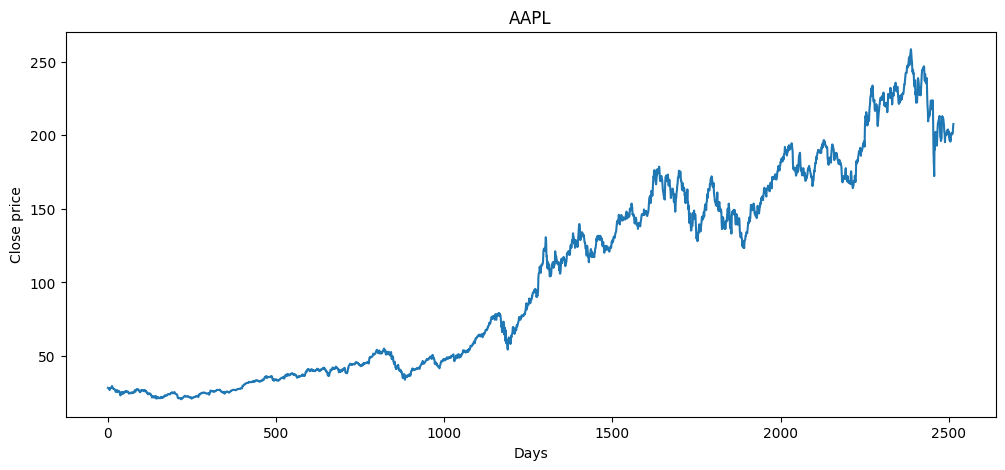

In [95]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

Feature Engineering

In [96]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [97]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [98]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


100 days moving average

In [99]:
df['MA_100'] = df.Close.rolling(100).mean()

df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200,NaN
1,2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000,NaN
2,2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600,NaN
3,2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200,NaN
4,2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400,NaN
...,...,...,...,...,...,...,...
98,2015-11-18,26.500931,26.546119,26.096491,26.155237,186698800,NaN
99,2015-11-19,26.837587,27.056753,26.381182,26.580012,173183200,26.201322
100,2015-11-20,26.955084,27.095168,26.853408,26.932488,137148400,26.187331


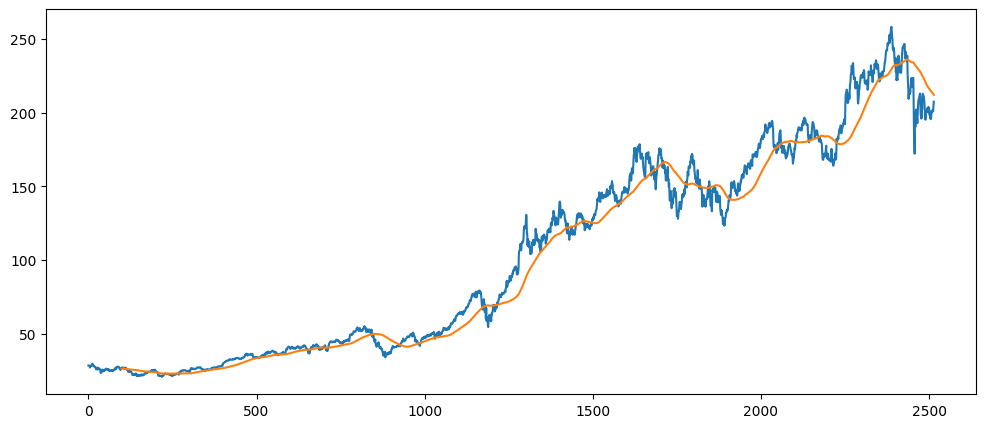

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'])


In [101]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-01,28.354204,28.430354,28.217584,28.421395,120955200,NaN,NaN
1,2015-07-02,28.318369,28.374361,28.168310,28.316129,108844000,NaN,NaN
2,2015-07-06,28.219828,28.271341,27.962265,27.982423,112241600,NaN,NaN
3,2015-07-07,28.150389,28.253413,27.720371,28.195181,187787200,NaN,NaN
4,2015-07-08,27.451614,27.915226,27.444896,27.879392,243046400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-04-14,25.465719,25.531599,25.290799,25.356679,101895600,23.714463,NaN
199,2016-04-15,24.954584,25.511151,24.927325,25.467988,187756000,23.695633,24.948478
200,2016-04-18,24.416197,24.750135,24.293525,24.736505,243286000,23.670245,24.928788


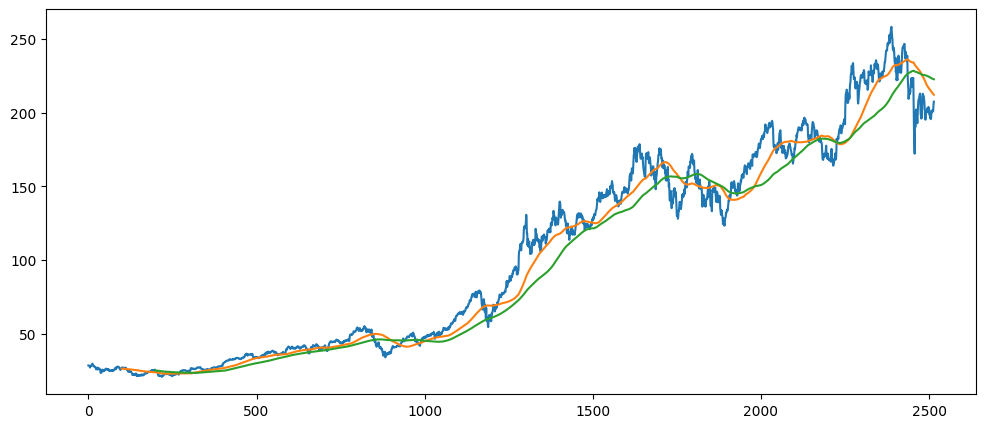

In [102]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.plot(df['MA_200'])

Calculating percentage changed in each trading session

In [103]:
df['Percentage Change'] = df.Close.pct_change()
df[['Close', 'Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,28.354204,NaN
1,28.318369,-0.001264
2,28.219828,-0.003480
3,28.150389,-0.002461
4,27.451614,-0.024823
...,...,...
2510,201.559998,0.006291
2511,201.000000,-0.002778
2512,201.080002,0.000398


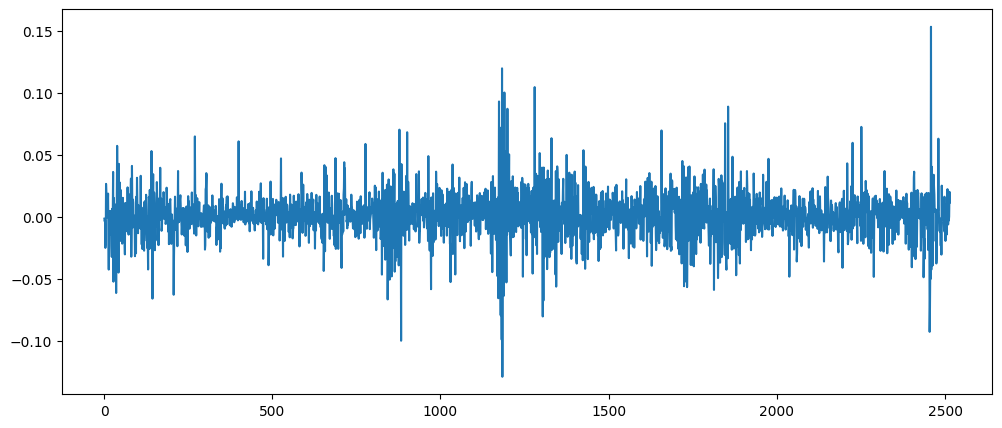

In [104]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Change'])

Data Preprocessing

In [105]:
df.shape

(2515, 9)

Splitting datainto Training and Testing datasets

In [106]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.354204
1        28.318369
2        28.219828
3        28.150389
4        27.451614
...            ...
1755    133.724594
1756    133.212845
1757    136.086716
1758    139.423187
1759    139.423187

[1760 rows x 1 columns]
Ticker        AAPL
1760    135.269836
1761    137.031570
1762    134.561203
1763    136.736298
1764    139.324768
...            ...
2510    201.559998
2511    201.000000
2512    201.080002
2513    205.169998
2514    207.570007

[755 rows x 1 columns]


Scaling down the data between 0 and 1

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [108]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04877743],
       [0.04855062],
       [0.04792693],
       ...,
       [0.73063659],
       [0.75175375],
       [0.75175375]])

In [109]:
type(data_training_array)

numpy.ndarray

In [110]:
data_training_array.shape

(1760, 1)

Sequence Creation

In [111]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [112]:
x_train

array([[[0.04877743],
        [0.04855062],
        [0.04792693],
        ...,
        [0.03189959],
        [0.03704771],
        [0.03917848]],

       [[0.04855062],
        [0.04792693],
        [0.04748744],
        ...,
        [0.03704771],
        [0.03917848],
        [0.03992213]],

       [[0.04792693],
        [0.04748744],
        [0.04306477],
        ...,
        [0.03917848],
        [0.03992213],
        [0.03770554]],

       ...,

       [[0.92744169],
        [0.95508572],
        [0.95402976],
        ...,
        [0.68883853],
        [0.71568629],
        [0.71244733]],

       [[0.95508572],
        [0.95402976],
        [0.96167083],
        ...,
        [0.71568629],
        [0.71244733],
        [0.73063659]],

       [[0.95402976],
        [0.96167083],
        [0.94340692],
        ...,
        [0.71244733],
        [0.73063659],
        [0.75175375]]])

In [113]:
x_train.ndim

3

In [114]:
y_train.ndim

1

In [115]:
x_train.shape

(1660, 100, 1)

In [116]:
y_train.shape

(1660,)

Model Building

In [117]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [118]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [119]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))


Model Training

In [120]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0332
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 5.5904e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 5.2389e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 5.0590e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 5.8970e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 5.4762e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 5.8628e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 5.2193e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 4.0967e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 3.9564e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 3.9008e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 3.5378e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 5.0799e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 3.9001e-

In [121]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
# Save the trained model
model.save('stock_preditcion_model.keras')

Prepering Test Data

In [123]:
data_training.tail(100)

Ticker,AAPL
1660,172.589706
1661,169.704041
1662,169.419037
1663,168.701630
1664,171.816971
...,...
1755,133.724594
1756,133.212845
1757,136.086716
1758,139.423187


In [124]:
data_testing

Ticker,AAPL
1760,135.269836
1761,137.031570
1762,134.561203
1763,136.736298
1764,139.324768
...,...
2510,201.559998
2511,201.000000
2512,201.080002
2513,205.169998


In [125]:
past_100_days = data_training.tail(100)

In [126]:
print(past_100_days)

Ticker        AAPL
1660    172.589706
1661    169.704041
1662    169.419037
1663    168.701630
1664    171.816971
...            ...
1755    133.724594
1756    133.212845
1757    136.086716
1758    139.423187
1759    139.423187

[100 rows x 1 columns]


In [127]:
final_df = pd.concat((past_100_days, data_testing), ignore_index=True)
final_df

Ticker,AAPL
0,172.589706
1,169.704041
2,169.419037
3,168.701630
4,171.816971
...,...
850,201.559998
851,201.000000
852,201.080002
853,205.169998


In [128]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.64277123e-01],
       [3.42897928e-01],
       [3.40786405e-01],
       [3.35471309e-01],
       [3.58552114e-01],
       [3.69110066e-01],
       [3.38820376e-01],
       [3.13482442e-01],
       [3.15229948e-01],
       [3.43699103e-01],
       [3.41951484e-01],
       [3.15229948e-01],
       [3.03725778e-01],
       [2.82028238e-01],
       [2.51083656e-01],
       [2.70524294e-01],
       [2.85887266e-01],
       [2.87852956e-01],
       [2.73873360e-01],
       [2.98337653e-01],
       [2.95935144e-01],
       [2.73655176e-01],
       [2.45477008e-01],
       [2.31934458e-01],
       [2.72052938e-01],
       [2.39798009e-01],
       [2.12202833e-01],
       [1.82277498e-01],
       [2.14823753e-01],
       [2.47588870e-01],
       [2.55088292e-01],
       [2.79552472e-01],
       [2.89746295e-01],
       [3.14793128e-01],
       [3.24913583e-01],
       [3.53018721e-01],
       [3.57751503e-01],
       [3.64158648e-01],
       [3.88623394e-01],
       [3.79958780e-01],


In [129]:
input_data.shape

(855, 1)

In [130]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i - 100: i])
  y_test.append(input_data[i, 0])

In [131]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [132]:
x_test

array([[[0.36427712],
        [0.34289793],
        [0.3407864 ],
        ...,
        [0.09383536],
        [0.11855446],
        [0.11855446]],

       [[0.34289793],
        [0.3407864 ],
        [0.33547131],
        ...,
        [0.11855446],
        [0.11855446],
        [0.0877833 ]],

       [[0.3407864 ],
        [0.33547131],
        [0.35855211],
        ...,
        [0.11855446],
        [0.0877833 ],
        [0.10083555]],

       ...,

       [[0.77080742],
        [0.80620997],
        [0.80377094],
        ...,
        [0.56957596],
        [0.57891095],
        [0.57476207]],

       [[0.80620997],
        [0.80377094],
        [0.80931417],
        ...,
        [0.57891095],
        [0.57476207],
        [0.57535478]],

       [[0.80377094],
        [0.80931417],
        [0.76799884],
        ...,
        [0.57476207],
        [0.57535478],
        [0.60565657]]])

In [133]:
y_test

array([8.77832957e-02, 1.00835554e-01, 8.25332032e-02, 9.86479494e-02,
       1.17825297e-01, 1.27742037e-01, 1.52753034e-01, 1.57784038e-01,
       1.41961071e-01, 1.49179906e-01, 1.46482339e-01, 1.68211420e-01,
       1.80607431e-01, 1.58002901e-01, 1.86659716e-01, 2.01534771e-01,
       2.18378794e-01, 2.09191217e-01, 2.00878637e-01, 1.91034699e-01,
       2.28878866e-01, 2.32962522e-01, 2.70587827e-01, 2.63296189e-01,
       2.52358619e-01, 2.96984235e-01, 2.94650911e-01, 2.92971234e-01,
       2.89466274e-01, 2.89831534e-01, 3.21375612e-01, 3.15899422e-01,
       3.42259090e-01, 3.50218054e-01, 3.49049809e-01, 3.60148813e-01,
       3.57227975e-01, 3.38024287e-01, 3.09181619e-01, 3.06698845e-01,
       3.08889389e-01, 3.27144146e-01, 2.80339178e-01, 2.63982846e-01,
       2.45947065e-01, 2.33606787e-01, 2.39010399e-01, 2.23311333e-01,
       2.13964810e-01, 2.24406435e-01, 2.13453717e-01, 2.34702115e-01,
       2.78951505e-01, 2.08926457e-01, 2.19660314e-01, 1.98192714e-01,
      

Making Predictions

In [134]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


In [135]:
y_predicted

array([[0.1124907 ],
       [0.10951673],
       [0.1061141 ],
       [0.09700013],
       [0.09453751],
       [0.10148665],
       [0.1126794 ],
       [0.13056988],
       [0.14642924],
       [0.15014526],
       [0.1513005 ],
       [0.15000735],
       [0.15644357],
       [0.16755347],
       [0.16743654],
       [0.17508347],
       [0.18794802],
       [0.20432386],
       [0.21180901],
       [0.21033485],
       [0.20272131],
       [0.21144712],
       [0.22308175],
       [0.24694656],
       [0.26183987],
       [0.26334426],
       [0.27963963],
       [0.2918397 ],
       [0.29687542],
       [0.29603595],
       [0.29398364],
       [0.3066701 ],
       [0.31531373],
       [0.33154804],
       [0.34637138],
       [0.3535991 ],
       [0.36070836],
       [0.36283147],
       [0.3533387 ],
       [0.3316917 ],
       [0.31599227],
       [0.30998617],
       [0.31792632],
       [0.30502418],
       [0.28588954],
       [0.26571715],
       [0.24872842],
       [0.242

In [136]:
y_test

array([8.77832957e-02, 1.00835554e-01, 8.25332032e-02, 9.86479494e-02,
       1.17825297e-01, 1.27742037e-01, 1.52753034e-01, 1.57784038e-01,
       1.41961071e-01, 1.49179906e-01, 1.46482339e-01, 1.68211420e-01,
       1.80607431e-01, 1.58002901e-01, 1.86659716e-01, 2.01534771e-01,
       2.18378794e-01, 2.09191217e-01, 2.00878637e-01, 1.91034699e-01,
       2.28878866e-01, 2.32962522e-01, 2.70587827e-01, 2.63296189e-01,
       2.52358619e-01, 2.96984235e-01, 2.94650911e-01, 2.92971234e-01,
       2.89466274e-01, 2.89831534e-01, 3.21375612e-01, 3.15899422e-01,
       3.42259090e-01, 3.50218054e-01, 3.49049809e-01, 3.60148813e-01,
       3.57227975e-01, 3.38024287e-01, 3.09181619e-01, 3.06698845e-01,
       3.08889389e-01, 3.27144146e-01, 2.80339178e-01, 2.63982846e-01,
       2.45947065e-01, 2.33606787e-01, 2.39010399e-01, 2.23311333e-01,
       2.13964810e-01, 2.24406435e-01, 2.13453717e-01, 2.34702115e-01,
       2.78951505e-01, 2.08926457e-01, 2.19660314e-01, 1.98192714e-01,
      

In [137]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [138]:
y_predicted

array([138.60474 , 138.20331 , 137.74405 , 136.51389 , 136.18149 ,
       137.11946 , 138.6302  , 141.04498 , 143.18561 , 143.68716 ,
       143.8431  , 143.66855 , 144.5373  , 146.03685 , 146.02107 ,
       147.05322 , 148.78961 , 150.99995 , 152.01025 , 151.8113  ,
       150.78365 , 151.96141 , 153.53181 , 156.75296 , 158.7632  ,
       158.96625 , 161.16573 , 162.81244 , 163.49214 , 163.37883 ,
       163.10182 , 164.81416 , 165.98085 , 168.17209 , 170.17287 ,
       171.14842 , 172.108   , 172.39458 , 171.11328 , 168.19148 ,
       166.07243 , 165.26176 , 166.33348 , 164.59201 , 162.00931 ,
       159.28653 , 156.99347 , 156.10416 , 155.09326 , 153.98535 ,
       153.89697 , 153.51984 , 154.39919 , 157.77928 , 156.49834 ,
       155.05061 , 152.86565 , 150.66452 , 150.80792 , 152.52902 ,
       152.80206 , 152.19897 , 150.66171 , 149.58665 , 149.4276  ,
       148.85005 , 145.59752 , 141.32344 , 139.84073 , 140.97014 ,
       142.66824 , 143.64859 , 142.13615 , 140.52667 , 138.911

In [139]:
y_test

array([135.26983643, 137.03157043, 134.561203  , 136.73629761,
       139.32476807, 140.6632843 , 144.03915405, 144.71821594,
       142.58250427, 143.55686951, 143.19276428, 146.12565613,
       147.79881287, 144.74775696, 148.61572266, 150.62348938,
       152.89701843, 151.65692139, 150.53492737, 149.20623779,
       154.31427002, 154.86546326, 159.94395447, 158.95976257,
       157.48345947, 163.50682068, 163.19187927, 162.96516418,
       162.49208069, 162.54138184, 166.79905701, 166.05990601,
       169.61781311, 170.69207764, 170.53439331, 172.03248596,
       171.63824463, 169.04621887, 165.15316772, 164.8180542 ,
       165.11372375, 167.57766724, 161.26014709, 159.05244446,
       156.61805725, 154.9524231 , 155.68177795, 153.56278992,
       152.30123901, 153.71060181, 152.23225403, 155.1002655 ,
       161.07284546, 151.6211853 , 153.06999207, 150.1723938 ,
       148.52645874, 152.25195312, 154.63705444, 151.50289917,
       150.53704834, 148.26036072, 148.59544373, 149.57

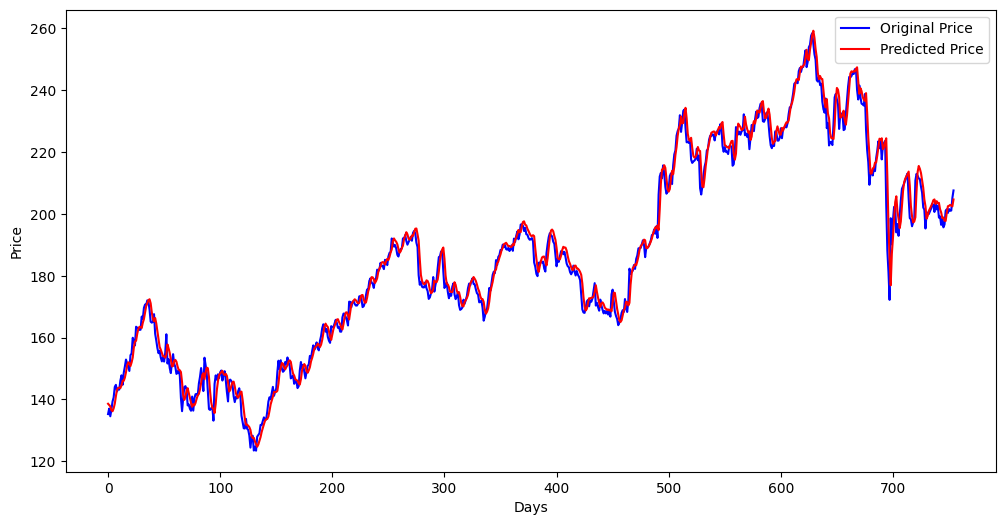

In [145]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

(140.0, 260.0)

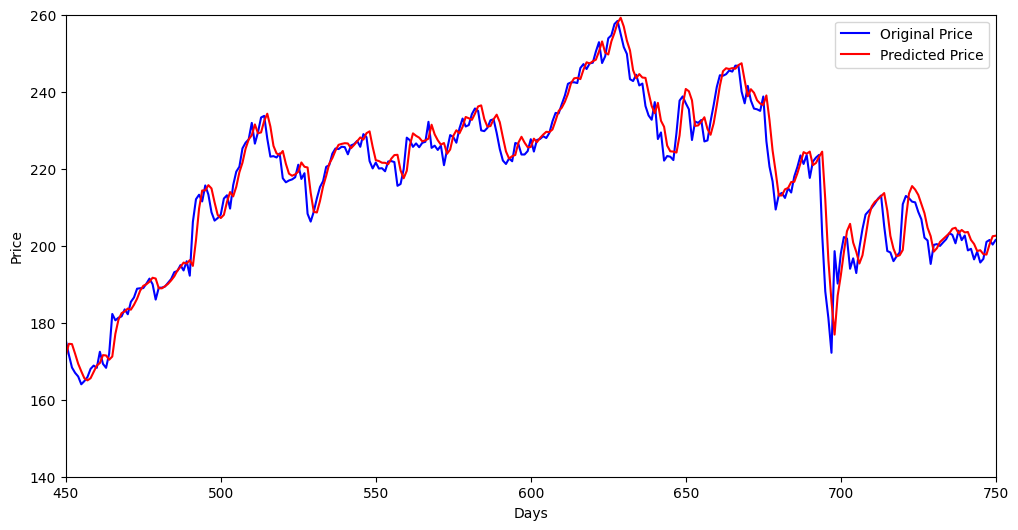

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 260)


Model Evaluation

In [151]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 14.234186254468336


In [150]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.77282205443993


In [152]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f'R-Squared: {r2}')

R-Squared: 0.9857991299678031
